In [39]:
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import re # for regular expressions
import pandas as pd 
pd.set_option("display.max_colwidth", 200) 
import string
import nltk # for text manipulation
from nltk.stem.porter import *
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from tqdm import tqdm
from gensim.models.doc2vec import TaggedDocument
import gensim
from sklearn.linear_model import LogisticRegression
from scipy import stats 
from sklearn import metrics 
from sklearn.metrics import mean_squared_error,mean_absolute_error, make_scorer,classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
import warnings 
import emoji
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
pd.set_option('display.max_colwidth', None)
import numpy as np
from PIL import Image
import re
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 115
plt.style.use("fivethirtyeight")
from typing import Dict, Any, List
import re
import plotly.graph_objects as go
warnings.filterwarnings("ignore")

%matplotlib inline

In [40]:
working_dir_path = 'tweets_dataset.csv'
df = pd.read_csv(working_dir_path,encoding = 'ISO-8859-1')
df.head(30)

,Unnamed: 0,Tweet Posted Time (UTC),Tweet Content,Tweet Location
0,0.0,2020-03-01,Why .Indians to prayer Iran a polluted http://person.is Not Allowed After taking buffalo Dog pig eaters Close.your.chapter.b.n.jha.Coronavirus: Sule requests EAM to rescue Indians in Iran,Bihar
1,15.0,2020-03-01,Corona virus update,Punjab
2,30.0,2020-03-01,@IndiGo6E I am trying to cancel my flight to coronavirus affected city Thailand but I am not able to do so without waive off of the cancellation charges. Please help in this time of need since my GoAir flight to Thailand is cancelled and I booked return ticket with Indigo,Delhi
3,45.0,2020-03-01,The Coronavirus will force the world to go Indian! The Chinese will become vegetarians and hugging hi-fives and air-kissing will give way for a restrained namaste! @ProsaicView,Delhi
4,60.0,2020-03-01,SFrance Announces To Ban Large Public Gathering To Slow The Spread Of #Coronavirus #COVID2019 #CoronaVirusUpdate,Delhi
5,75.0,2020-03-01,First #Coronavirus death in the US reported??,Chennai
6,90.0,2020-03-01,Corona virus could wipe out physically weak senior citizens from many countries. Those who died from the corona virus were mostly senior citizens aged above 60 years and were physically weak.,Kolkata
7,105.0,2020-03-01,What countries have been affected by the Novel coronavirus? How many cases are there in China? Real-time updates on the number of cases worldwide. https://infographics.channelnewsasia.com/covid-19/map.html via @ChannelNewsAsia,Bangalore
8,5.0,2020-03-02,Haha its about coronavirus baiji !,Chandigarh
9,20.0,2020-03-02,Unsubstantiated rumours being spread by Governments at the behest of the poultry industry to declare poultry and eggs safe from #coronavirus. No scientific backing to such claims. Tons of data to show that meat and eggs are easiest vehicles for pathogens to enter your body.,Delhi


In [41]:
df.shape

(54327, 4)

In [42]:
df = df[['Tweet Posted Time (UTC)','Tweet Content','Tweet Location']]
df.rename(columns={'Tweet Content': 'original tweets'}, inplace=True)
df.head()

,Tweet Posted Time (UTC),original tweets,Tweet Location
0,2020-03-01,Why .Indians to prayer Iran a polluted http://person.is Not Allowed After taking buffalo Dog pig eaters Close.your.chapter.b.n.jha.Coronavirus: Sule requests EAM to rescue Indians in Iran,Bihar
1,2020-03-01,Corona virus update,Punjab
2,2020-03-01,@IndiGo6E I am trying to cancel my flight to coronavirus affected city Thailand but I am not able to do so without waive off of the cancellation charges. Please help in this time of need since my GoAir flight to Thailand is cancelled and I booked return ticket with Indigo,Delhi
3,2020-03-01,The Coronavirus will force the world to go Indian! The Chinese will become vegetarians and hugging hi-fives and air-kissing will give way for a restrained namaste! @ProsaicView,Delhi
4,2020-03-01,SFrance Announces To Ban Large Public Gathering To Slow The Spread Of #Coronavirus #COVID2019 #CoronaVirusUpdate,Delhi


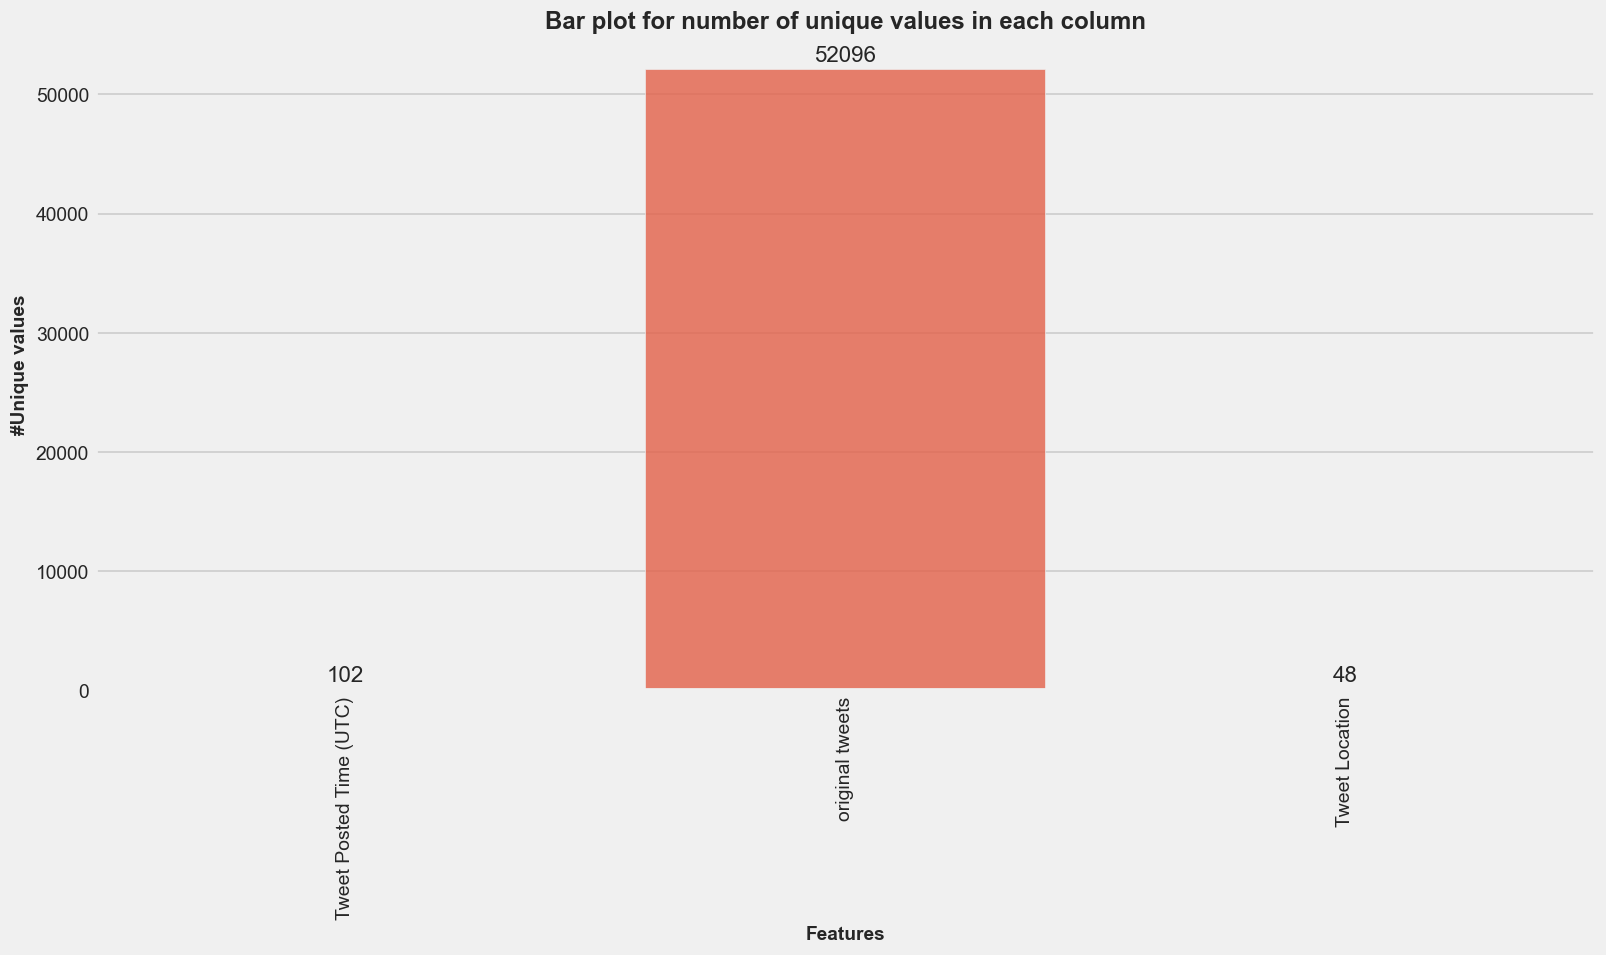

In [43]:
unique_df = pd.DataFrame()
unique_df['Features'] = df.columns
unique=[]
for i in df.columns:
    unique.append(df[i].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

In [44]:
Top_Location_Of_tweet= df['Tweet Location'].value_counts().head(10)

sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('white')
Top_Location_Of_tweet.head(10)

Tweet Location
Delhi          7671
Mumbai         7447
Chennai        5287
Bangalore      5196
Kolkata        4860
Pune           4473
Hyderabad      4431
Chandigarh     2345
Ahmedabad      1928
Bhubaneswar    1718
Name: count, dtype: int64

In [45]:
Top_Location_Of_tweet_df=pd.DataFrame(Top_Location_Of_tweet)
Top_Location_Of_tweet_df.reset_index(inplace=True)
Top_Location_Of_tweet_df.rename(columns={'index':'Location', 'Tweet Location':'Location'}, inplace=True)
Top_Location_Of_tweet_df

,Location,count
0,Delhi,7671
1,Mumbai,7447
2,Chennai,5287
3,Bangalore,5196
4,Kolkata,4860
5,Pune,4473
6,Hyderabad,4431
7,Chandigarh,2345
8,Ahmedabad,1928
9,Bhubaneswar,1718


[Text(0, 0, 'Delhi'),
 Text(1, 0, 'Mumbai'),
 Text(2, 0, 'Chennai'),
 Text(3, 0, 'Bangalore'),
 Text(4, 0, 'Kolkata'),
 Text(5, 0, 'Pune'),
 Text(6, 0, 'Hyderabad'),
 Text(7, 0, 'Chandigarh'),
 Text(8, 0, 'Ahmedabad'),
 Text(9, 0, 'Bhubaneswar')]

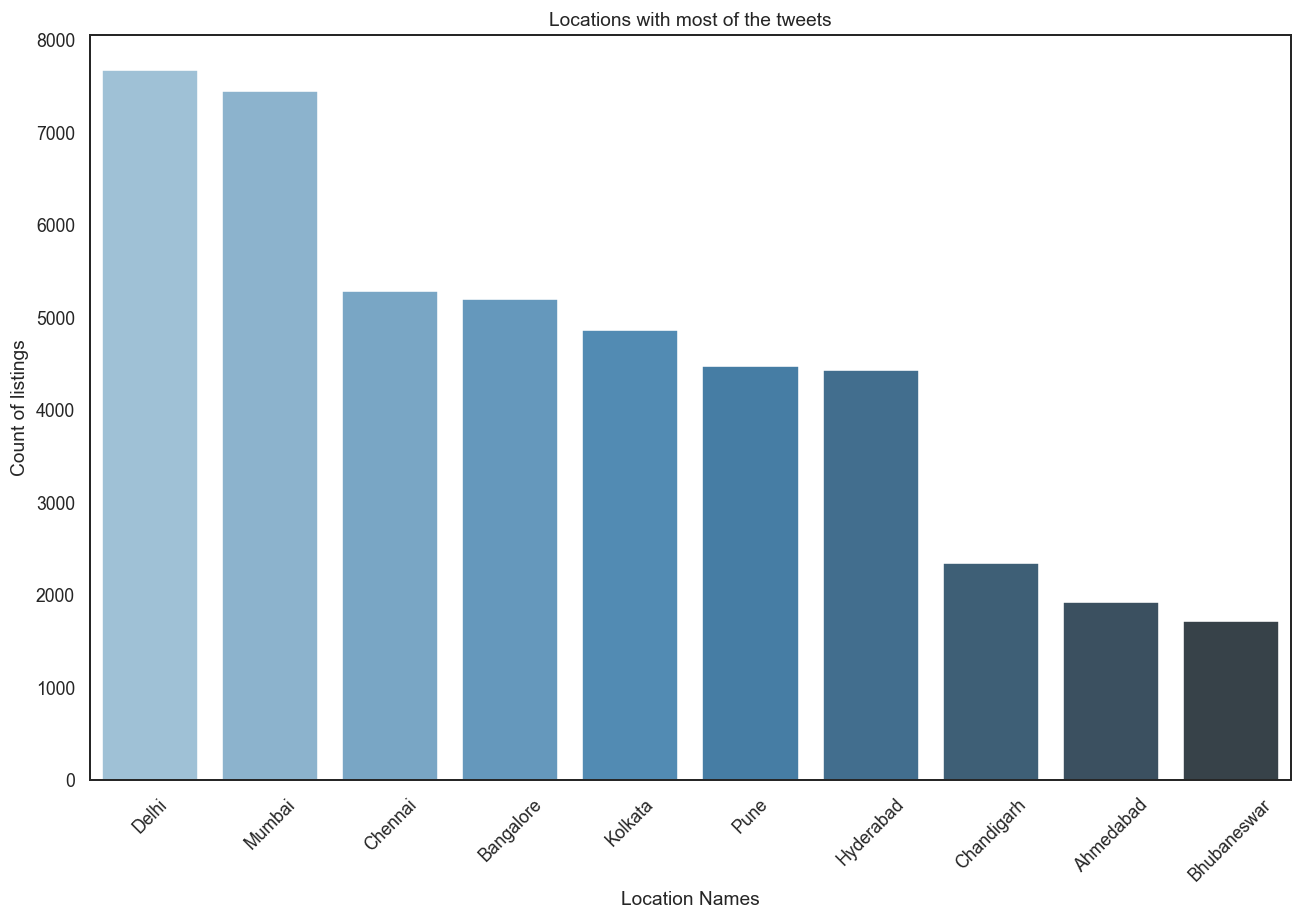

In [46]:
viz_1=sns.barplot(x="Location", y="count", data=Top_Location_Of_tweet_df,
                 palette='Blues_d')
viz_1.set_title('Locations with most of the tweets')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Location Names')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

In [47]:
timestamp_counts = df['Tweet Posted Time (UTC)'].value_counts()

# Print the result
print(timestamp_counts)

Tweet Posted Time (UTC)
2020-05-01                 2341
2020-05-06                 2331
2020-04-30                 1910
2020-05-05                 1874
2020-04-29                 1872
                           ... 
2020-03-07                   20
2020-03-08                   16
2020-03-02                   14
2020-03-01                    8
Tweet Posted Time (UTC)       7
Name: count, Length: 102, dtype: int64


In [48]:
# write function for removing @user
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt
# create new column with removed @user
df['Tweet'] = np.vectorize(remove_pattern)(df['original tweets'], '@[\w]*')

In [49]:
df.head()

,Tweet Posted Time (UTC),original tweets,Tweet Location,Tweet
0,2020-03-01,Why .Indians to prayer Iran a polluted http://person.is Not Allowed After taking buffalo Dog pig eaters Close.your.chapter.b.n.jha.Coronavirus: Sule requests EAM to rescue Indians in Iran,Bihar,Why .Indians to prayer Iran a polluted http://person.is Not Allowed After taking buffalo Dog pig eaters Close.your.chapter.b.n.jha.Coronavirus: Sule requests EAM to rescue Indians in Iran
1,2020-03-01,Corona virus update,Punjab,Corona virus update
2,2020-03-01,@IndiGo6E I am trying to cancel my flight to coronavirus affected city Thailand but I am not able to do so without waive off of the cancellation charges. Please help in this time of need since my GoAir flight to Thailand is cancelled and I booked return ticket with Indigo,Delhi,I am trying to cancel my flight to coronavirus affected city Thailand but I am not able to do so without waive off of the cancellation charges. Please help in this time of need since my GoAir flight to Thailand is cancelled and I booked return ticket with Indigo
3,2020-03-01,The Coronavirus will force the world to go Indian! The Chinese will become vegetarians and hugging hi-fives and air-kissing will give way for a restrained namaste! @ProsaicView,Delhi,The Coronavirus will force the world to go Indian! The Chinese will become vegetarians and hugging hi-fives and air-kissing will give way for a restrained namaste!
4,2020-03-01,SFrance Announces To Ban Large Public Gathering To Slow The Spread Of #Coronavirus #COVID2019 #CoronaVirusUpdate,Delhi,SFrance Announces To Ban Large Public Gathering To Slow The Spread Of #Coronavirus #COVID2019 #CoronaVirusUpdate


In [50]:
#remove url and http
import re
df['Tweet'] = df['Tweet'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
df.head()

,Tweet Posted Time (UTC),original tweets,Tweet Location,Tweet
0,2020-03-01,Why .Indians to prayer Iran a polluted http://person.is Not Allowed After taking buffalo Dog pig eaters Close.your.chapter.b.n.jha.Coronavirus: Sule requests EAM to rescue Indians in Iran,Bihar,Why .Indians to prayer Iran a polluted http://person.is Not Allowed After taking buffalo Dog pig eaters Close.your.chapter.b.n.jha.Coronavirus: Sule requests EAM to rescue Indians in Iran
1,2020-03-01,Corona virus update,Punjab,Corona virus update
2,2020-03-01,@IndiGo6E I am trying to cancel my flight to coronavirus affected city Thailand but I am not able to do so without waive off of the cancellation charges. Please help in this time of need since my GoAir flight to Thailand is cancelled and I booked return ticket with Indigo,Delhi,I am trying to cancel my flight to coronavirus affected city Thailand but I am not able to do so without waive off of the cancellation charges. Please help in this time of need since my GoAir flight to Thailand is cancelled and I booked return ticket with Indigo
3,2020-03-01,The Coronavirus will force the world to go Indian! The Chinese will become vegetarians and hugging hi-fives and air-kissing will give way for a restrained namaste! @ProsaicView,Delhi,The Coronavirus will force the world to go Indian! The Chinese will become vegetarians and hugging hi-fives and air-kissing will give way for a restrained namaste!
4,2020-03-01,SFrance Announces To Ban Large Public Gathering To Slow The Spread Of #Coronavirus #COVID2019 #CoronaVirusUpdate,Delhi,SFrance Announces To Ban Large Public Gathering To Slow The Spread Of #Coronavirus #COVID2019 #CoronaVirusUpdate


In [51]:
# remove special characters, numbers, punctuations
df['Tweet'] = df['Tweet'].apply(lambda x: re.sub('[^a-zA-Z#]+', ' ', x))
df.head(5)

,Tweet Posted Time (UTC),original tweets,Tweet Location,Tweet
0,2020-03-01,Why .Indians to prayer Iran a polluted http://person.is Not Allowed After taking buffalo Dog pig eaters Close.your.chapter.b.n.jha.Coronavirus: Sule requests EAM to rescue Indians in Iran,Bihar,Why Indians to prayer Iran a polluted http person is Not Allowed After taking buffalo Dog pig eaters Close your chapter b n jha Coronavirus Sule requests EAM to rescue Indians in Iran
1,2020-03-01,Corona virus update,Punjab,Corona virus update
2,2020-03-01,@IndiGo6E I am trying to cancel my flight to coronavirus affected city Thailand but I am not able to do so without waive off of the cancellation charges. Please help in this time of need since my GoAir flight to Thailand is cancelled and I booked return ticket with Indigo,Delhi,I am trying to cancel my flight to coronavirus affected city Thailand but I am not able to do so without waive off of the cancellation charges Please help in this time of need since my GoAir flight to Thailand is cancelled and I booked return ticket with Indigo
3,2020-03-01,The Coronavirus will force the world to go Indian! The Chinese will become vegetarians and hugging hi-fives and air-kissing will give way for a restrained namaste! @ProsaicView,Delhi,The Coronavirus will force the world to go Indian The Chinese will become vegetarians and hugging hi fives and air kissing will give way for a restrained namaste
4,2020-03-01,SFrance Announces To Ban Large Public Gathering To Slow The Spread Of #Coronavirus #COVID2019 #CoronaVirusUpdate,Delhi,SFrance Announces To Ban Large Public Gathering To Slow The Spread Of #Coronavirus #COVID #CoronaVirusUpdate


In [52]:
%%time

# function to get the subjectivity
def get_subjectivity(Tweet: str) -> float:
    return TextBlob(Tweet).sentiment.subjectivity

# function to get the polarity
def get_polarity(Tweet: str) -> float:
    return TextBlob(Tweet).sentiment.polarity

# add new columns to dataframe - subjectivity, polarity
df["subjectivity"] = df["Tweet"].apply(get_subjectivity)
df["polarity"] = df["Tweet"].apply(get_polarity)

df.head()

CPU times: total: 16.1 s
Wall time: 17.1 s


,Tweet Posted Time (UTC),original tweets,Tweet Location,Tweet,subjectivity,polarity
0,2020-03-01,Why .Indians to prayer Iran a polluted http://person.is Not Allowed After taking buffalo Dog pig eaters Close.your.chapter.b.n.jha.Coronavirus: Sule requests EAM to rescue Indians in Iran,Bihar,Why Indians to prayer Iran a polluted http person is Not Allowed After taking buffalo Dog pig eaters Close your chapter b n jha Coronavirus Sule requests EAM to rescue Indians in Iran,0.000000,0.000000
1,2020-03-01,Corona virus update,Punjab,Corona virus update,0.000000,0.000000
2,2020-03-01,@IndiGo6E I am trying to cancel my flight to coronavirus affected city Thailand but I am not able to do so without waive off of the cancellation charges. Please help in this time of need since my GoAir flight to Thailand is cancelled and I booked return ticket with Indigo,Delhi,I am trying to cancel my flight to coronavirus affected city Thailand but I am not able to do so without waive off of the cancellation charges Please help in this time of need since my GoAir flight to Thailand is cancelled and I booked return ticket with Indigo,0.625000,-0.250000
3,2020-03-01,The Coronavirus will force the world to go Indian! The Chinese will become vegetarians and hugging hi-fives and air-kissing will give way for a restrained namaste! @ProsaicView,Delhi,The Coronavirus will force the world to go Indian The Chinese will become vegetarians and hugging hi fives and air kissing will give way for a restrained namaste,0.000000,0.000000
4,2020-03-01,SFrance Announces To Ban Large Public Gathering To Slow The Spread Of #Coronavirus #COVID2019 #CoronaVirusUpdate,Delhi,SFrance Announces To Ban Large Public Gathering To Slow The Spread Of #Coronavirus #COVID #CoronaVirusUpdate,0.298413,-0.028571


In [53]:
%%time

# function that computes the negative, neutral and positive sentiment
def get_sentiment(score: float) -> str:
    if score < 0:
        return "negative"
    elif score == 0:
        return "neutral"
    else:
        return "positive"
    
df["sentiment"] = df["polarity"].apply(get_sentiment)

df.head()

CPU times: total: 0 ns
Wall time: 12 ms


,Tweet Posted Time (UTC),original tweets,Tweet Location,Tweet,subjectivity,polarity,sentiment
0,2020-03-01,Why .Indians to prayer Iran a polluted http://person.is Not Allowed After taking buffalo Dog pig eaters Close.your.chapter.b.n.jha.Coronavirus: Sule requests EAM to rescue Indians in Iran,Bihar,Why Indians to prayer Iran a polluted http person is Not Allowed After taking buffalo Dog pig eaters Close your chapter b n jha Coronavirus Sule requests EAM to rescue Indians in Iran,0.000000,0.000000,neutral
1,2020-03-01,Corona virus update,Punjab,Corona virus update,0.000000,0.000000,neutral
2,2020-03-01,@IndiGo6E I am trying to cancel my flight to coronavirus affected city Thailand but I am not able to do so without waive off of the cancellation charges. Please help in this time of need since my GoAir flight to Thailand is cancelled and I booked return ticket with Indigo,Delhi,I am trying to cancel my flight to coronavirus affected city Thailand but I am not able to do so without waive off of the cancellation charges Please help in this time of need since my GoAir flight to Thailand is cancelled and I booked return ticket with Indigo,0.625000,-0.250000,negative
3,2020-03-01,The Coronavirus will force the world to go Indian! The Chinese will become vegetarians and hugging hi-fives and air-kissing will give way for a restrained namaste! @ProsaicView,Delhi,The Coronavirus will force the world to go Indian The Chinese will become vegetarians and hugging hi fives and air kissing will give way for a restrained namaste,0.000000,0.000000,neutral
4,2020-03-01,SFrance Announces To Ban Large Public Gathering To Slow The Spread Of #Coronavirus #COVID2019 #CoronaVirusUpdate,Delhi,SFrance Announces To Ban Large Public Gathering To Slow The Spread Of #Coronavirus #COVID #CoronaVirusUpdate,0.298413,-0.028571,negative


In [54]:
# function that returns total sentiment and percentage
def get_percantage(df: pd.DataFrame, col: str) -> pd.DataFrame:
    data = df.get(col).value_counts().to_frame().rename(columns={"sentiment":"sentiment_total"})
    data["percentage"] = round(df.get(col).value_counts(normalize=True) * 100, 2)
    return data


get_percantage(df, "sentiment")

,count,percentage
sentiment,,
positive,25511,46.96
neutral,17719,32.62
negative,11097,20.43


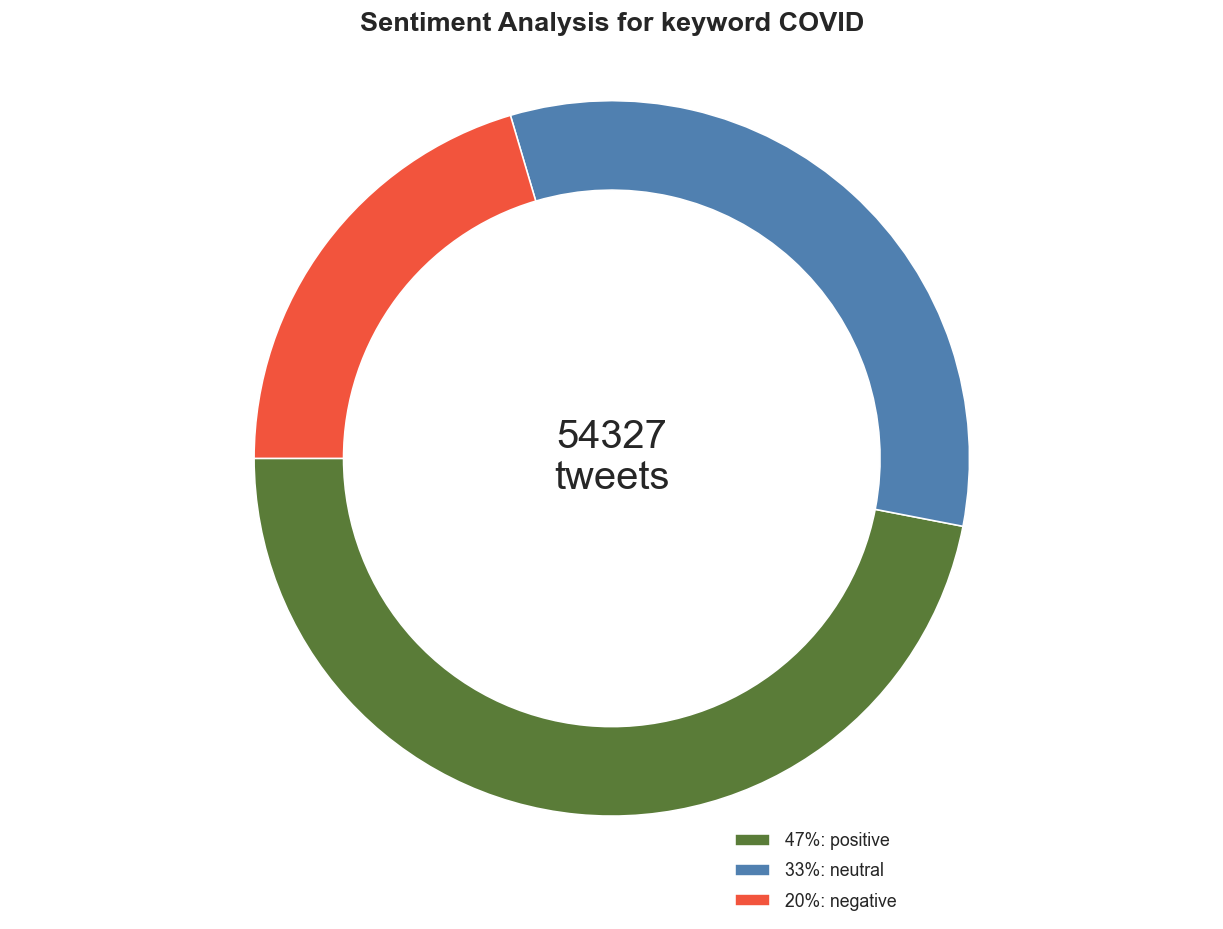

In [55]:
def make_pie(df: pd.DataFrame, colors: List, header: str) -> None:
    
        # sort the index, because of the colors order - positive:green, neutral:blue, negative:red
        df = df.sort_index(ascending=False)
        
        total = sum(df.iloc[:,0])
        
        fig, ax = plt.subplots()
        ax.axis('equal')

        ax.set_prop_cycle("color", colors)
        
        outside, _ = ax.pie(df.iloc[:,0], radius=1.2, startangle=180)

        plt.setp(outside, width=0.3, edgecolor='white')

        ax.text(0, 0, f"{total}\ntweets", ha='center', va='center', size=25)
        
        ax.legend(['{:.0f}%: {}'.format(int(row.values) / total * 100, index) for index, row in df.iterrows()],
                  frameon=False, bbox_to_anchor=(0.75, 0.02), labelspacing=0.7)
        
        ax.annotate(header, size=17, fontweight="semibold", xy=(1, 1), xycoords='data',
                    horizontalalignment='center', verticalalignment='top', xytext=(0, 1.5))

        plt.show()
        

data = get_percantage(df, "sentiment")[['count']]
colors = ['#5a7c38','#5080b0','#F2543D']
header = 'Sentiment Analysis for keyword COVID'

make_pie(data, colors=colors, header=header)

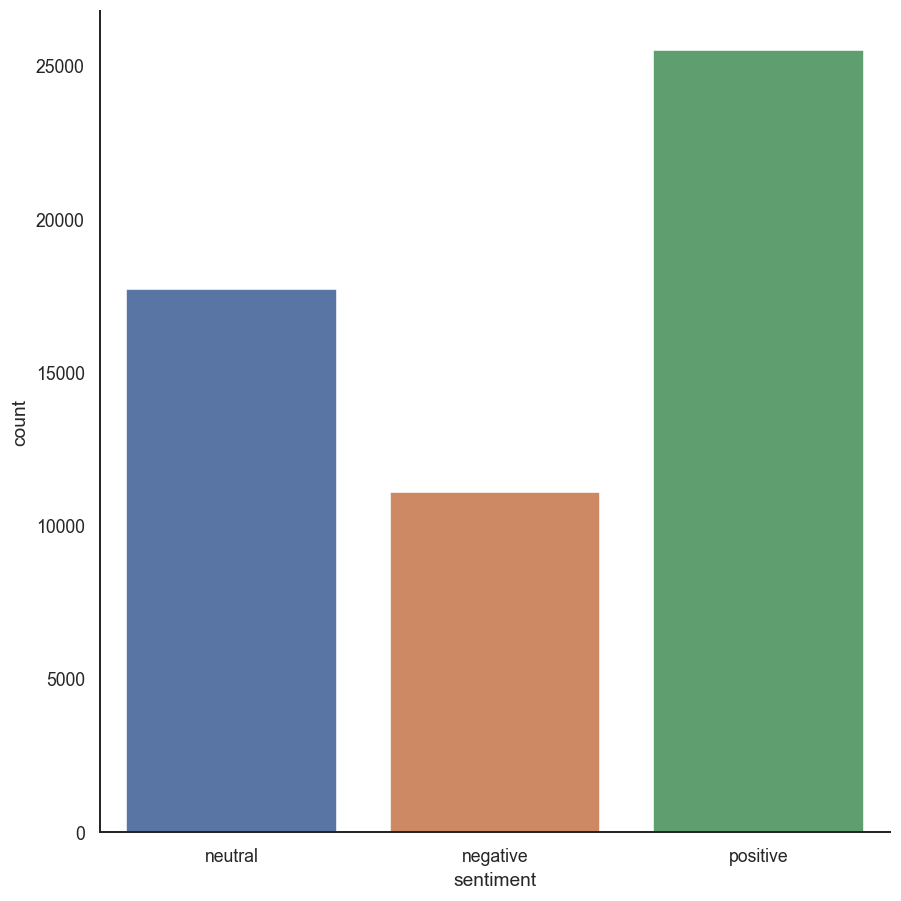

In [56]:
sns.catplot(x="sentiment", data=df, kind="count", height=8)

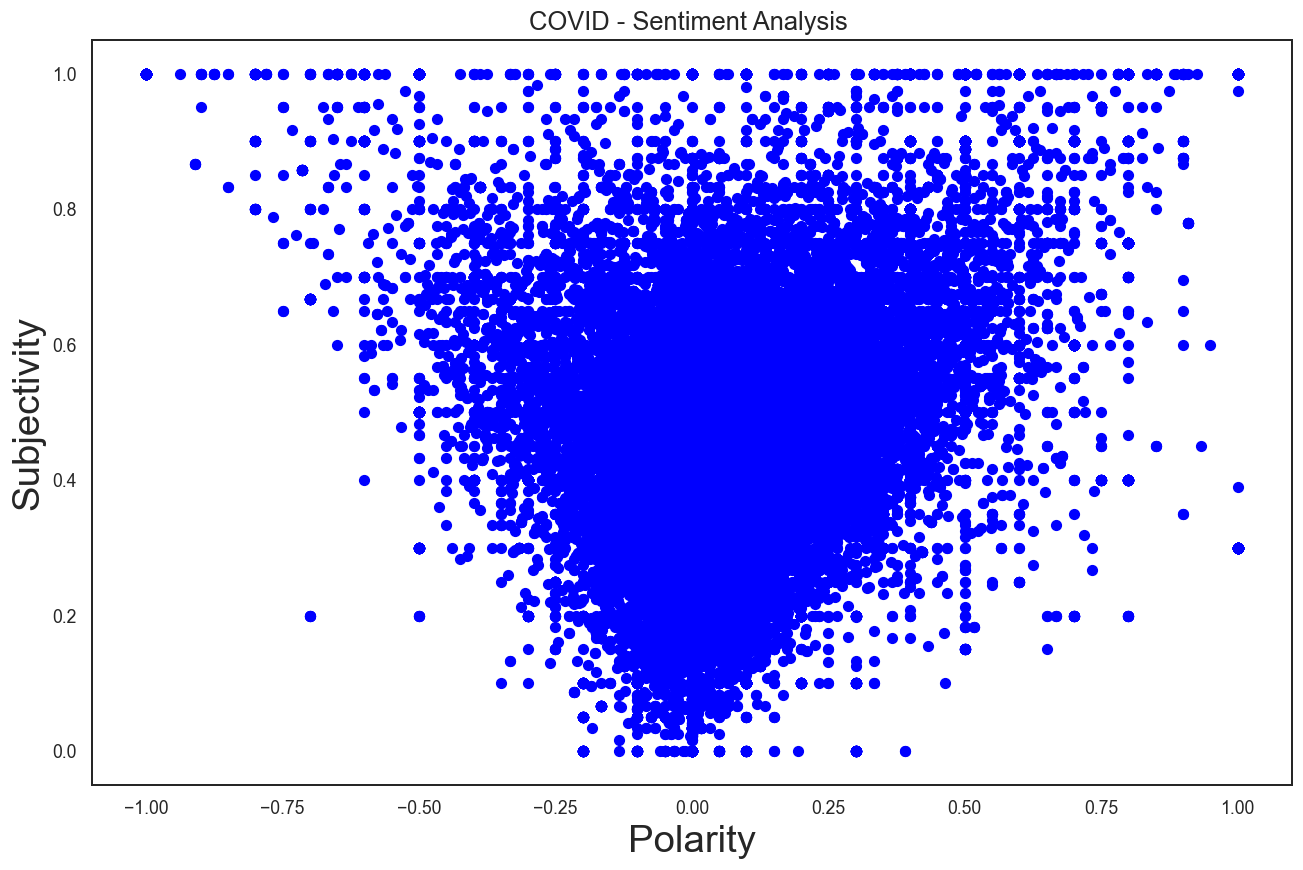

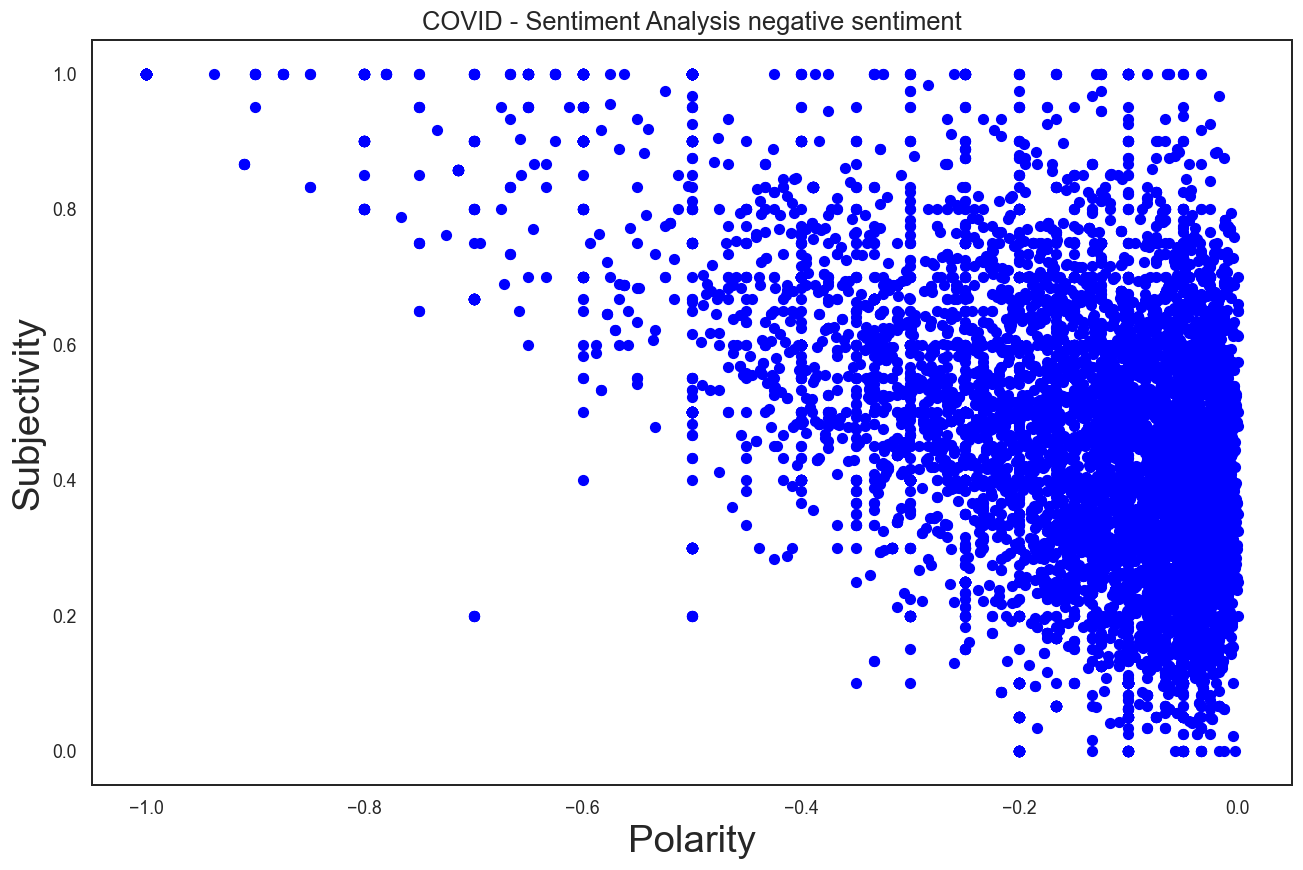

In [57]:
# display polarity and subjectivity
def create_scatterplot(data: pd.DataFrame, title: str = "") -> None:
    plt.scatter(data["polarity"], data["subjectivity"], color="Blue")

    plt.title(f"COVID - Sentiment Analysis {title}", size=16)
    plt.xlabel("Polarity", size=24)
    plt.ylabel("Subjectivity", size=24)
    
    plt.show()

create_scatterplot(df)
create_scatterplot(df.query("sentiment == 'negative'"), "negative sentiment")

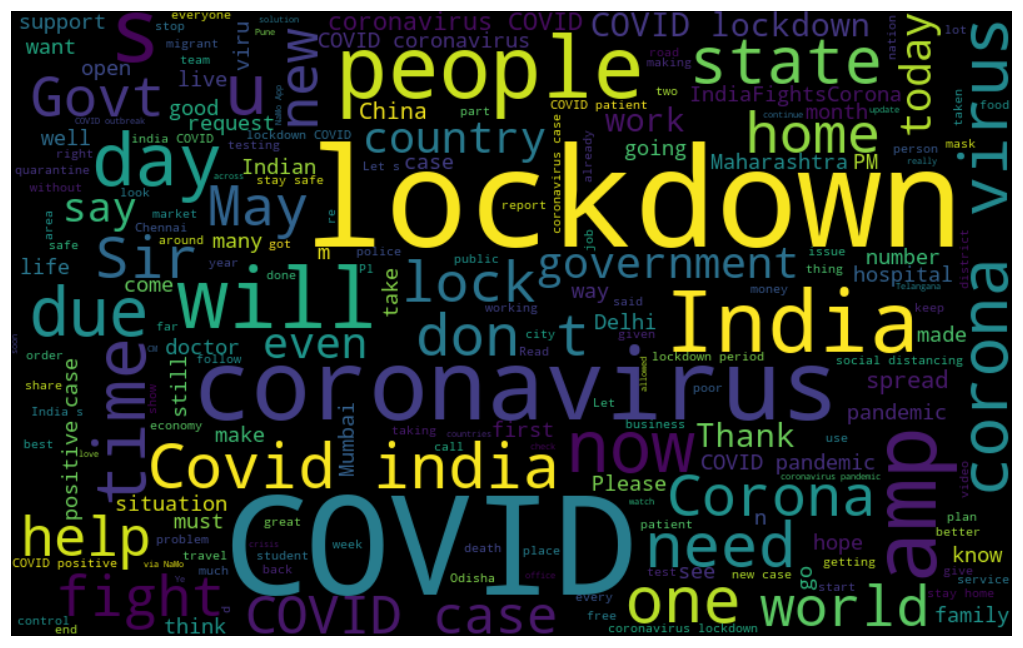

In [60]:
# create text from all tweets
all_words = ' '.join([text for text in df['Tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

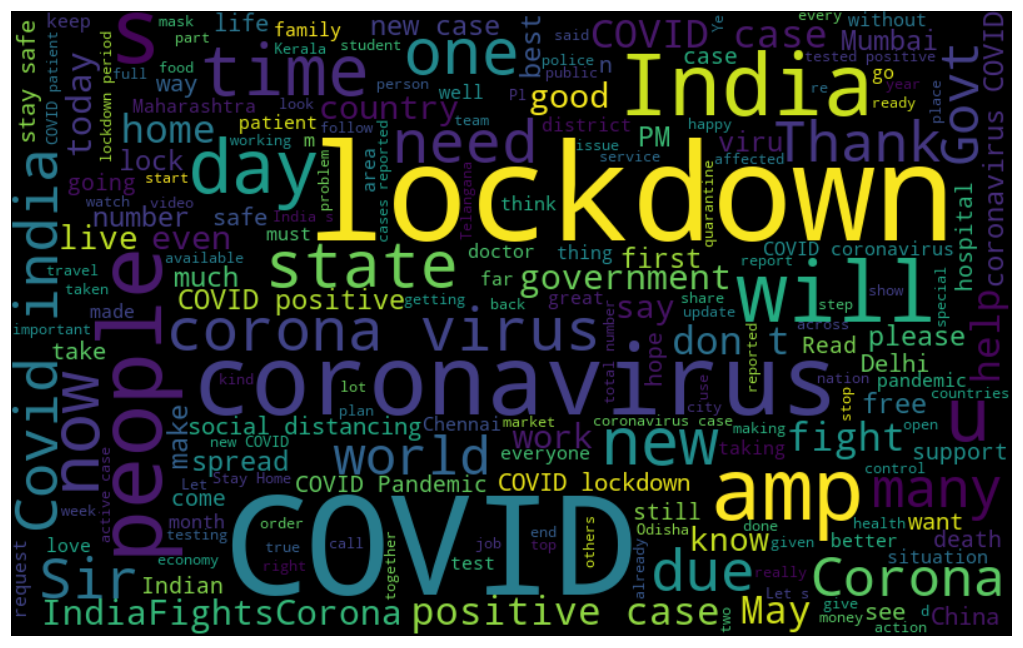

In [61]:
normal_words = ' '.join([text for text in df['Tweet'][df['sentiment'] == 'positive']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

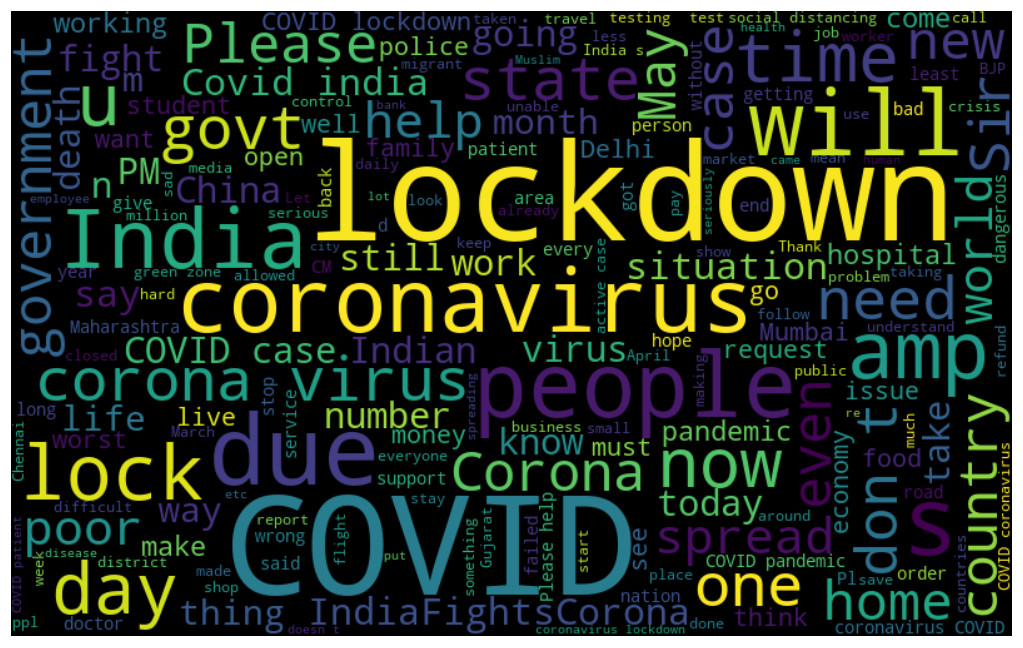

In [62]:
normal_words = ' '.join([text for text in df['Tweet'][df['sentiment'] == 'negative']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

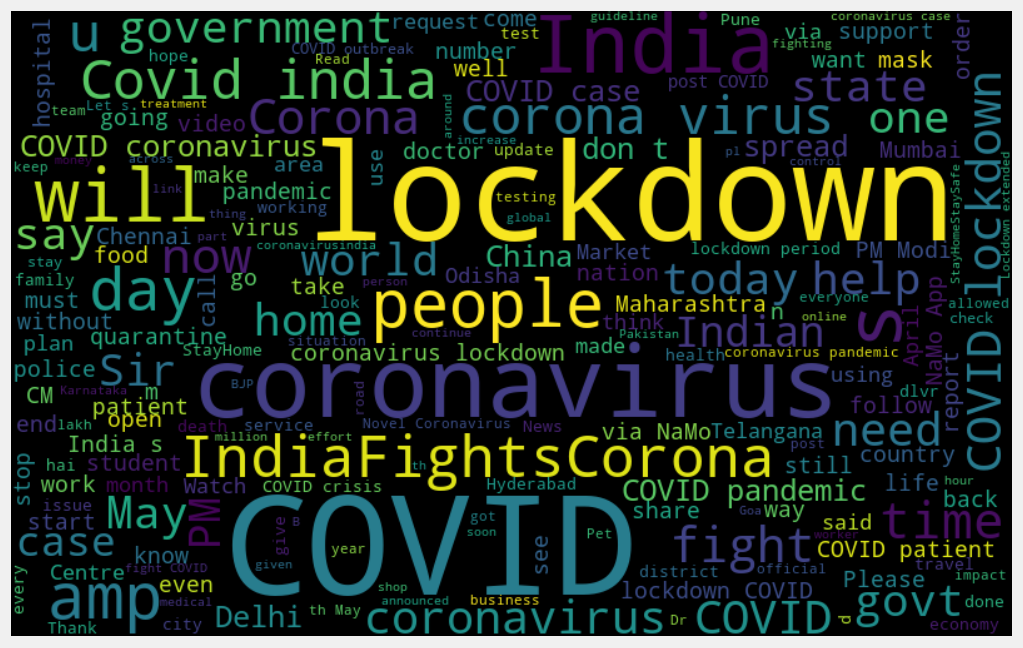

In [18]:
normal_words = ' '.join([text for text in df['Tweet'][df['sentiment'] == 'neutral']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [63]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r'#(\w+)', i)
        hashtags.append(ht)
    return hashtags
# extracting hashtags from non racist/sexist tweets
HT_Positive = hashtag_extract(df['original tweets'][df['sentiment'] == 'positive'])
HT_Neutral = hashtag_extract(df['original tweets'][df['sentiment'] == 'neutral'])
HT_Negative = hashtag_extract(df['original tweets'][df['sentiment'] == 'negative'])



# unnesting list
HT_Positive = sum(HT_Positive, [])
HT_Neutral = sum(HT_Neutral, [])
HT_Negative = sum(HT_Negative,[])

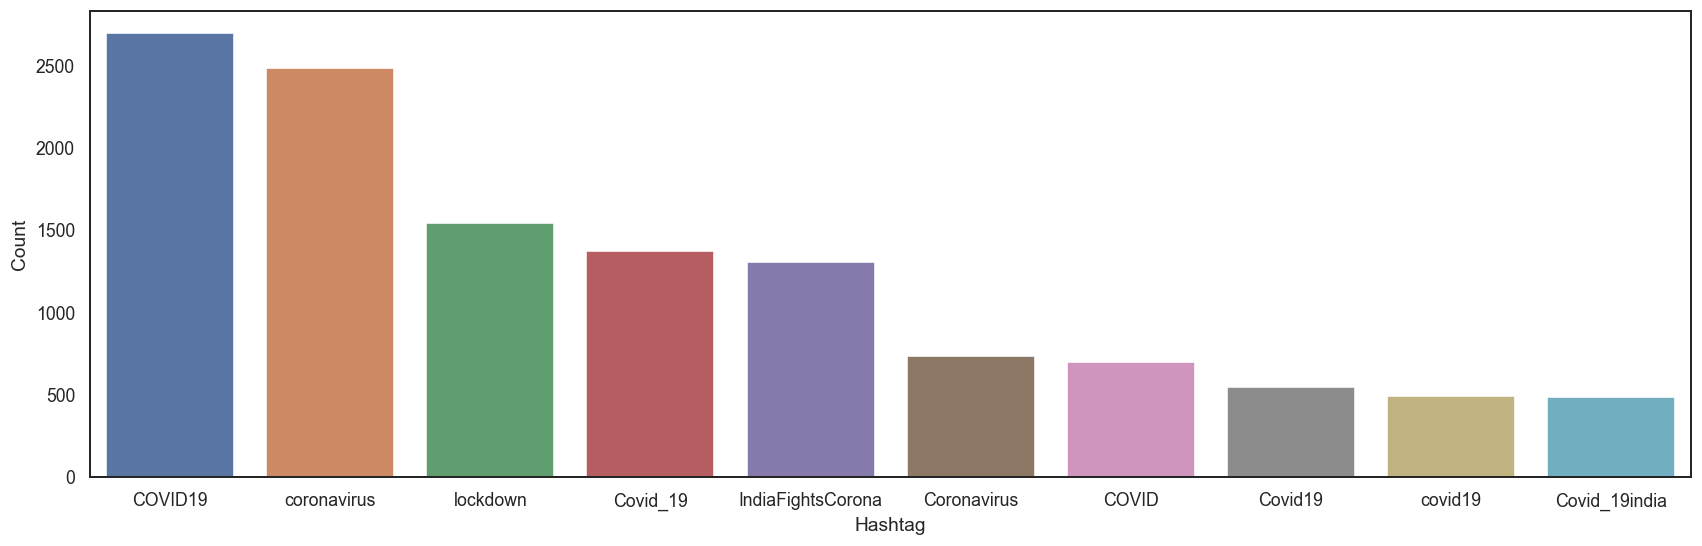

In [64]:
# making frequency distribution top 10 Positive hashtags
a = nltk.FreqDist(HT_Positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count' : list(a.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.show()

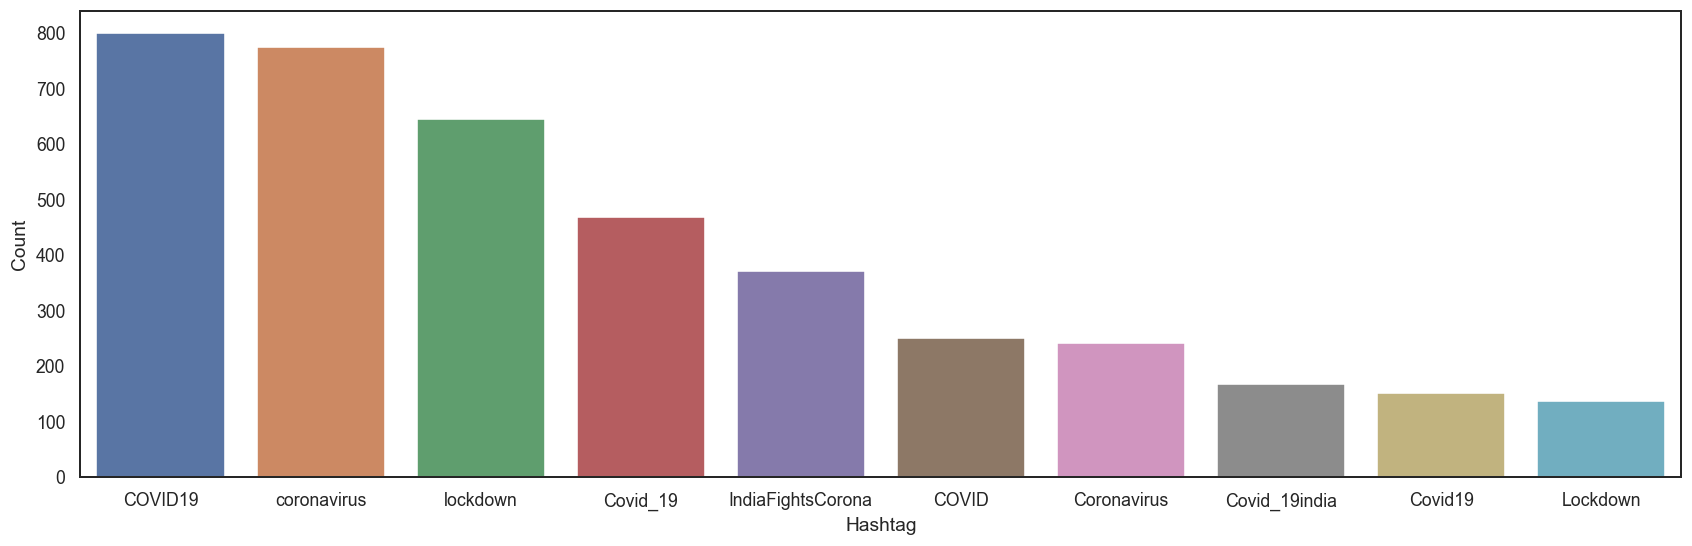

In [65]:
# making frequency distribution top 10 negative hashtags
a = nltk.FreqDist(HT_Negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count' : list(a.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.show()

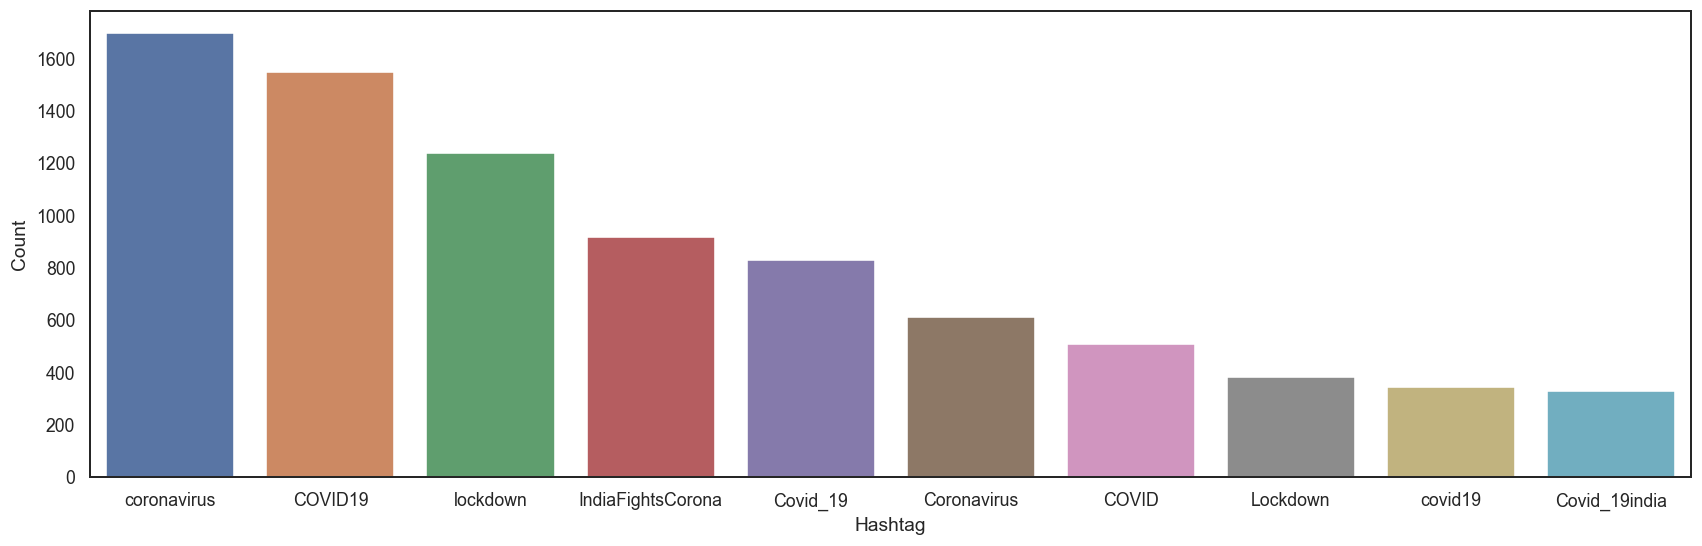

In [66]:
# making frequency distribution top 10 neutral hashtags
a = nltk.FreqDist(HT_Neutral)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count' : list(a.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.show()

In [67]:
new_df = df[['Tweet','sentiment']]
new_df.head()

,Tweet,sentiment
0,Why Indians to prayer Iran a polluted http person is Not Allowed After taking buffalo Dog pig eaters Close your chapter b n jha Coronavirus Sule requests EAM to rescue Indians in Iran,neutral
1,Corona virus update,neutral
2,I am trying to cancel my flight to coronavirus affected city Thailand but I am not able to do so without waive off of the cancellation charges Please help in this time of need since my GoAir flight to Thailand is cancelled and I booked return ticket with Indigo,negative
3,The Coronavirus will force the world to go Indian The Chinese will become vegetarians and hugging hi fives and air kissing will give way for a restrained namaste,neutral
4,SFrance Announces To Ban Large Public Gathering To Slow The Spread Of #Coronavirus #COVID #CoronaVirusUpdate,negative


In [68]:
from sklearn.model_selection import train_test_split

train,valid = train_test_split(new_df,test_size = 0.2,random_state=0,stratify = new_df.sentiment.values) #stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
print("train shape : ", train.shape)
print("valid shape : ", valid.shape)

train shape :  (43461, 2)
valid shape :  (10866, 2)


In [69]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.Tweet.values)
X_valid = vectorizer.transform(valid.Tweet.values)

y_train = train.sentiment.values
y_valid = valid.sentiment.values

print("X_train.shape : ", X_train.shape)
print("X_train.shape : ", X_valid.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)

X_train.shape :  (43461, 49987)
X_train.shape :  (10866, 49987)
y_train.shape :  (43461,)
y_valid.shape :  (10866,)


In [70]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_valid)
NB_accuracy = accuracy_score(y_valid,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_valid))

training accuracy Score    :  0.8306067508800994
Validation accuracy Score :  0.6892140622124057
              precision    recall  f1-score   support

    negative       0.51      0.66      0.58      1739
     neutral       0.51      0.85      0.63      2103
    positive       0.89      0.65      0.75      7024

    accuracy                           0.69     10866
   macro avg       0.64      0.72      0.65     10866
weighted avg       0.76      0.69      0.70     10866



In [71]:
from sklearn.linear_model import LogisticRegression

# Create an instance of Logistic Regression classifier
logistic_reg_clf = LogisticRegression(max_iter=1000)

# Fit the classifier on the training data
logistic_reg_clf.fit(X_train, y_train)

# Make predictions on the validation data
logistic_reg_prediction = logistic_reg_clf.predict(X_valid)

# Calculate accuracy
logistic_reg_accuracy = accuracy_score(y_valid, logistic_reg_prediction)

# Print accuracy and classification report
print("Logistic Regression:")
print("Training accuracy Score:", logistic_reg_clf.score(X_train, y_train))
print("Validation accuracy Score:", logistic_reg_accuracy)
print(classification_report(logistic_reg_prediction, y_valid))

Logistic Regression:
Training accuracy Score: 0.9774280389314558
Validation accuracy Score: 0.871986011411743
              precision    recall  f1-score   support

    negative       0.73      0.83      0.78      1966
     neutral       0.94      0.85      0.89      3931
    positive       0.88      0.91      0.90      4969

    accuracy                           0.87     10866
   macro avg       0.85      0.86      0.86     10866
weighted avg       0.88      0.87      0.87     10866



In [72]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_valid)
sgd_accuracy = accuracy_score(y_valid,sgd_prediction)
print("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_valid))

Training accuracy Score    :  0.9539357124778537
Validation accuracy Score :  0.8865267807840972
              precision    recall  f1-score   support

    negative       0.75      0.85      0.80      1968
     neutral       0.97      0.86      0.91      3981
    positive       0.89      0.92      0.91      4917

    accuracy                           0.89     10866
   macro avg       0.87      0.88      0.87     10866
weighted avg       0.89      0.89      0.89     10866



In [73]:
models = pd.DataFrame({
    'Model': ['Naive Bayes', 'Logistic Regression', 
              'Stochastic Gradient Decent'],
    'Test accuracy': [NB_accuracy, 
              logistic_reg_accuracy, sgd_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

,Model,Test accuracy
2,Stochastic Gradient Decent,0.886527
1,Logistic Regression,0.871986
0,Naive Bayes,0.689214


In [103]:
custom_test_data = ["government issues protective measures for #Coronavirus Must follow. good measure not only for self but for others too.	"]
# Preprocess the custom test data using the same vectorizer
X_custom_test = vectorizer.transform(custom_test_data)

# Use the model to make predictions on the custom test data
custom_predictions = logistic_reg_clf.predict(X_custom_test)
print("predicted sentiment: "+custom_predictions[0])

predicted sentiment: positive


In [105]:
custom_test_data = ["If you thought 2020 was off to a bad start with all the coronavirus recession riots and whatnot.... Think again"]
# Preprocess the custom test data using the same vectorizer
X_custom_test = vectorizer.transform(custom_test_data)

# Use the model to make predictions on the custom test data
custom_predictions = sgd_clf.predict(X_custom_test)
print("predicted sentiment: "+custom_predictions[0])

predicted sentiment: negative
